# Important Note: 

This notebook is meant to be used with csvs generated by my other project, [assetto-corsa-lap-logger-plus](https://github.com/RakeJyals/assetto-corsa-lap-logger-plus)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def transform_df(df):
    df["worst_tire_wear"] = df[[f"tire_wear{i}" for i in range(1, 5)]].min(axis = 1, )
    df["delta_tire_wear"] = df["worst_tire_wear"].diff()
    df["fuel_consumption"] = df["fuel"].diff()
    return df

In [3]:
df = transform_df(pd.read_csv("lap-logs/Jake-Imola-Minitest2.csv", header = 0))

In [5]:
df

,time,fuel,tire_wear1,tire_wear2,tire_wear3,tire_wear4,worst_tire_wear,delta_tire_wear,fuel_consumption
1,122963,96.89,99.96,99.95,99.98,99.98,99.95,NaN,NaN
2,105222,93.93,99.92,99.90,99.96,99.95,99.90,-0.05,-2.96
3,104364,90.99,99.88,99.84,99.94,99.93,99.84,-0.06,-2.94
4,103023,88.00,99.83,99.78,99.91,99.90,99.78,-0.06,-2.99
5,103598,85.03,99.79,99.73,99.89,99.88,99.73,-0.05,-2.97
6,117587,82.02,99.73,99.67,99.86,99.85,99.67,-0.06,-3.01
7,116683,79.34,99.69,99.61,99.84,99.83,99.61,-0.06,-2.68
8,126433,76.12,99.65,99.56,99.82,99.80,99.56,-0.05,-3.22
9,103289,73.16,99.60,99.50,99.79,99.74,99.50,-0.06,-2.96
10,103592,70.20,99.56,99.44,99.74,99.68,99.44,-0.06,-2.96


In [4]:
df2 = transform_df(pd.read_csv("lap-logs/Jake-Portimao-NewLong.csv", header = 0))

In [4]:
def distplots(df):  # TODO: Vertical line for each pit stop
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

    axes[0].plot(df["time"])
    axes[0].set_title("Distribution of lap times")
    #axes[0].set_xticks(rotation = 45)  # Need to generate new ticks to use

    axes[1].plot(df["delta_tire_wear"])
    axes[1].set_title("Distribution of tire wear")

    axes[2].plot(df[df.fuel_consumption < 0].fuel_consumption)
    axes[2].set_title("Fuel consumption")

plt.show()

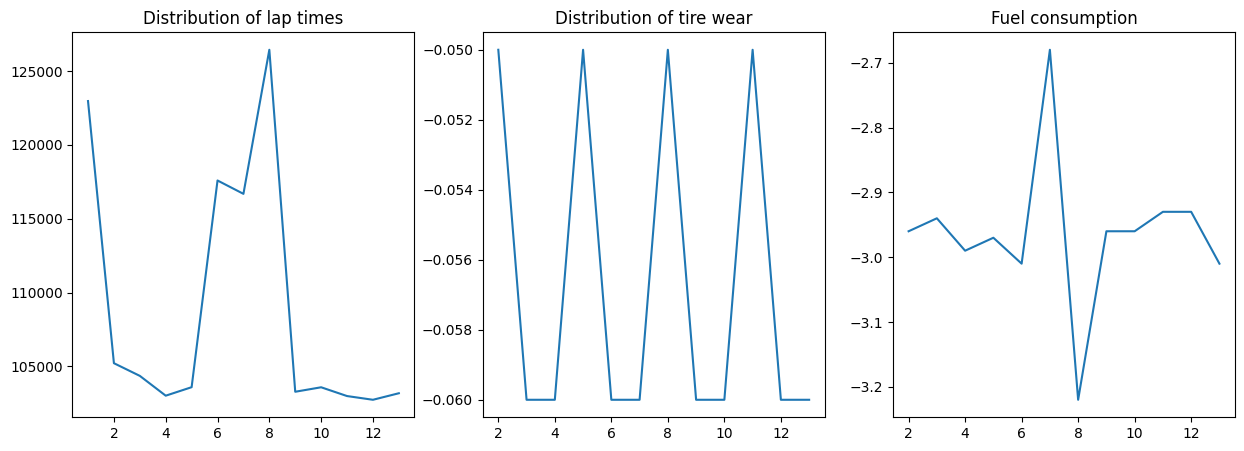

In [5]:
#distplots(df[df["time"] < 200000])
distplots(df)

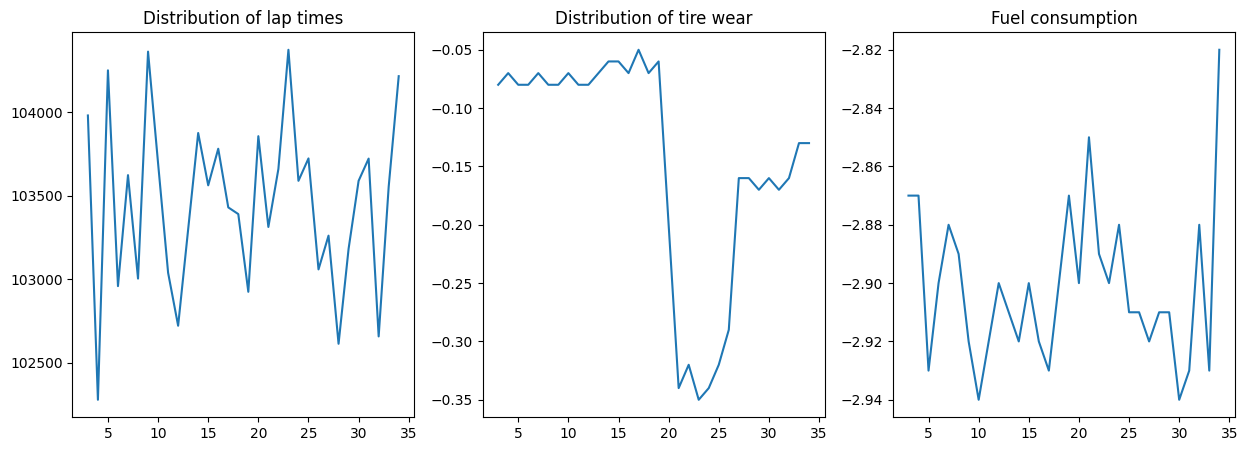

In [10]:
distplots(df2[(df2["time"] > 50000) & (df2["time"] < 111000)])

In [11]:
df2[df2.fuel_consumption < 0].fuel_consumption.mean()

np.float64(-2.9003030303030304)

In [6]:
df[(df.fuel_consumption < -2.8) & (df.fuel_consumption > -3.2)].fuel_consumption.mean()

np.float64(-2.966000000000001)

In [ ]:
df2[(df2["time"] > 50000) & (df2["time"] < 110000)].time.mean()

np.float64(103458.45161290323)

In [13]:
df[df["time"] < 110000].time.mean()

np.float64(103557.77777777778)

In [5]:
# Reading multiple tables
files_to_read = [
    "lap-logs/Jake-Portimao-NewLong.csv",
    "lap-logs/Jake-Portimao-UltraLong.csv",
    "lap-logs/Jake-Portimao-Med.csv",
    "lap-logs/Jake-Portimao-Day2-Long.csv",
    "lap-logs/Jake-Portimao-Day2-2.csv",
    "lap-logs/Jake-Portimao-Day2-1.csv"
]

dfs = []
for i, path in enumerate(files_to_read):
    new_df = transform_df(pd.read_csv(path, header = 0))
    new_df["session"] = i
    new_df.set_index([new_df.index, new_df.session], inplace=True)
    dfs.append(new_df)

combined_df = pd.concat(dfs)
    

In [38]:
combined_df.head()

,,time,fuel,tire_wear1,tire_wear2,tire_wear3,tire_wear4,worst_tire_wear,delta_tire_wear,fuel_consumption,session
,session,,,,,,,,,,
1,0,0,97.04,99.93,99.95,99.97,99.97,99.93,NaN,NaN,0
2,0,142664,94.14,99.85,99.89,99.93,99.94,99.85,-0.08,-2.90,0
3,0,103979,91.27,99.77,99.84,99.90,99.92,99.77,-0.08,-2.87,0
4,0,102278,88.40,99.70,99.78,99.87,99.89,99.70,-0.07,-2.87,0
5,0,104249,85.47,99.62,99.73,99.83,99.86,99.62,-0.08,-2.93,0


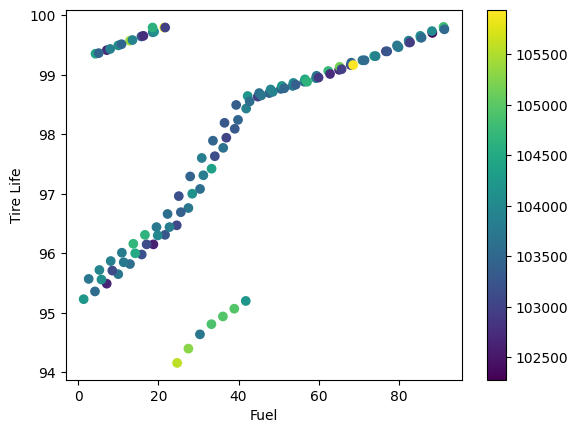

In [23]:
tcf = plt.scatter(df_to_plot.fuel, df_to_plot.worst_tire_wear, c = df_to_plot.time)
plt.colorbar(tcf)
plt.xlabel("Fuel")
plt.ylabel("Tire Life")
plt.show()